# Build CNN model

Create first versions of the CNN model and test different hyperparameters

In [2]:
# Imports

import numpy as np
from tensorflow import keras

from keras import optimizers, models, Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

## Import data

In [73]:
train_folder = '/home/florenceboutin/code/FlorenceBoutin/GI_disease_detection/raw_data/train'
val_folder = '/home/florenceboutin/code/FlorenceBoutin/GI_disease_detection/raw_data/val'
test_folder = '/home/florenceboutin/code/FlorenceBoutin/GI_disease_detection/raw_data/test'

datagen = ImageDataGenerator(rescale = 1. / 255)
train_dataset = datagen.flow_from_directory(train_folder,
                                         target_size = (224, 224),
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         class_mode = "categorical")

val_dataset = datagen.flow_from_directory(val_folder,
                                         target_size = (224, 224),
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         class_mode = "categorical")

test_dataset = datagen.flow_from_directory(test_folder,
                                         target_size = (224, 224),
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         class_mode = "categorical", shuffle=False)

Found 2400 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## Create model

In [120]:
recall = tf.keras.metrics.Recall()
es = EarlyStopping(patience=5, restore_best_weights=True)
es_recall = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_recall_2', mode='max')
adam_opt = optimizers.Adam(learning_rate=0.0001)
adam_opt_1 = optimizers.Adam(learning_rate=0.01)
adam_opt_2 = optimizers.Adam(learning_rate=0.005)

### Model 1 : 
- val_recall: 0.6607
- val_accuracy: 0.6607

In [3]:
model_1 = Sequential()

2023-03-07 10:15:04.883700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-07 10:15:04.883782: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-07 10:15:04.883803: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ASUS_Flo): /proc/driver/nvidia/version does not exist
2023-03-07 10:15:04.884204: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model_1.add(layers.Conv2D(6, kernel_size=(4, 4), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_1.add(layers.MaxPool2D(pool_size=(2,2)))
model_1.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model_1.add(layers.MaxPool2D(pool_size=(2,2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(10, activation='relu'))
model_1.add(layers.Dense(3, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 6)       294       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      1760      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 96800)             0         
                                                                 
 dense (Dense)               (None, 10)                9

In [9]:
model_1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [11]:
model_1.fit(train_dataset, 
            epochs=20,
           callbacks=[es],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 21s 266ms/step - loss: 0.7547 - recall: 0.3812 - accuracy: 0.5967 - val_loss: 0.5918 - val_recall: 0.6413 - val_accuracy: 0.6507
Epoch 2/20
75/75 [==============================] - 15s 203ms/step - loss: 0.4317 - recall: 0.6654 - accuracy: 0.6783 - val_loss: 0.6073 - val_recall: 0.6667 - val_accuracy: 0.6667
Epoch 3/20
75/75 [==============================] - 15s 205ms/step - loss: 0.3430 - recall: 0.6662 - accuracy: 0.7467 - val_loss: 0.7796 - val_recall: 0.6653 - val_accuracy: 0.6653
Epoch 4/20
75/75 [==============================] - 15s 199ms/step - loss: 0.2763 - recall: 0.8167 - accuracy: 0.8929 - val_loss: 2.0781 - val_recall: 0.6640 - val_accuracy: 0.6640
Epoch 5/20
75/75 [==============================] - 14s 191ms/step - loss: 0.2665 - recall: 0.9450 - accuracy: 0.9550 - val_loss: 1.9427 - val_recall: 0.6640 - val_accuracy: 0.6640
Epoch 6/20
75/75 [==============================] - 14s 191ms/step - loss: 0.1142 - recall: 0.9

### Model 2 : 
- val_recall: 0.6647 
- val_accuracy: 0.6647

In [16]:
model_2 = Sequential()

model_2.add(layers.Conv2D(128, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPool2D(pool_size=(3,3)))
model_2.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
model_2.add(layers.MaxPool2D(pool_size=(2,2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(15, activation='relu'))
model_2.add(layers.Dense(3, activation='softmax'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 64)        32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 82944)             0         
                                                                 
 dense_6 (Dense)             (None, 15)               

In [17]:
model_2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [18]:
model_2.fit(train_dataset, 
            epochs=20,
           callbacks=[es],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 74s 945ms/step - loss: 0.2186 - recall: 0.8028 - accuracy: 0.9087 - val_loss: 1.9713 - val_recall: 0.6327 - val_accuracy: 0.6347
Epoch 2/20
75/75 [==============================] - 73s 971ms/step - loss: 0.0210 - recall: 0.9933 - accuracy: 0.9933 - val_loss: 3.3000 - val_recall: 0.6647 - val_accuracy: 0.6647
Epoch 3/20
75/75 [==============================] - 68s 906ms/step - loss: 0.0050 - recall: 0.9983 - accuracy: 0.9983 - val_loss: 5.4223 - val_recall: 0.6447 - val_accuracy: 0.6447
Epoch 4/20
75/75 [==============================] - 70s 934ms/step - loss: 7.4495e-04 - recall: 1.0000 - accuracy: 1.0000 - val_loss: 4.7447 - val_recall: 0.6580 - val_accuracy: 0.6580
Epoch 5/20
75/75 [==============================] - 71s 951ms/step - loss: 2.3319e-04 - recall: 1.0000 - accuracy: 1.0000 - val_loss: 5.4086 - val_recall: 0.6607 - val_accuracy: 0.6607
Epoch 6/20
75/75 [==============================] - 72s 956ms/step - loss: 1.4435e-04 -

### Model 3 a : ⭐
- val_recall: 0.7320 
- val_accuracy: 0.7587
- Optimizer = adam
- Learning rate = 0.001

In [121]:
model_3 = Sequential()

model_3.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_3.add(layers.MaxPool2D(pool_size=(3,3)))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_3.add(layers.MaxPool2D(pool_size=(2,2)))
model_3.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_3.add(layers.MaxPool2D(pool_size=(2,2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(15, activation='relu'))
model_3.add(layers.Dropout(0.3))
model_3.add(layers.Dense(5, activation='relu'))
model_3.add(layers.Dense(3, activation='softmax'))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 35, 35, 16)       

In [122]:
result = model_3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [123]:
history = model_3.fit(train_dataset, 
            epochs=20,
           callbacks=[es_recall],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 36s 468ms/step - loss: 0.8237 - recall_2: 0.2717 - accuracy: 0.5850 - val_loss: 0.8572 - val_recall_2: 0.3333 - val_accuracy: 0.5827
Epoch 2/20
75/75 [==============================] - 37s 491ms/step - loss: 0.6854 - recall_2: 0.3217 - accuracy: 0.6821 - val_loss: 0.8428 - val_recall_2: 0.3333 - val_accuracy: 0.6560
Epoch 3/20
75/75 [==============================] - 35s 462ms/step - loss: 0.6299 - recall_2: 0.3642 - accuracy: 0.7642 - val_loss: 0.9202 - val_recall_2: 0.3753 - val_accuracy: 0.6087
Epoch 4/20
75/75 [==============================] - 35s 463ms/step - loss: 0.5616 - recall_2: 0.4846 - accuracy: 0.8271 - val_loss: 0.9531 - val_recall_2: 0.3813 - val_accuracy: 0.7033
Epoch 5/20
75/75 [==============================] - 35s 467ms/step - loss: 0.4144 - recall_2: 0.6900 - accuracy: 0.8400 - val_loss: 0.9145 - val_recall_2: 0.6473 - val_accuracy: 0.6673
Epoch 6/20
75/75 [==============================] - 35s 466ms/step - loss: 

In [124]:
model_3.evaluate(test_dataset)

19/19 [==============================] - 3s 153ms/step - loss: 1.3419 - recall_2: 0.6600 - accuracy: 0.6600


[1.341923475265503, 0.6600000262260437, 0.6600000262260437]

In [125]:
predictions = model_3.predict(test_dataset)

19/19 [==============================] - 3s 144ms/step


In [126]:
predictions = np.round(predictions, 0)

In [127]:
predictions=pd.DataFrame(predictions)

In [132]:
y_pred = np.array(predictions.idxmax(1))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [133]:
y_true = test_dataset.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [131]:
test_dataset.class_indices

{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2}

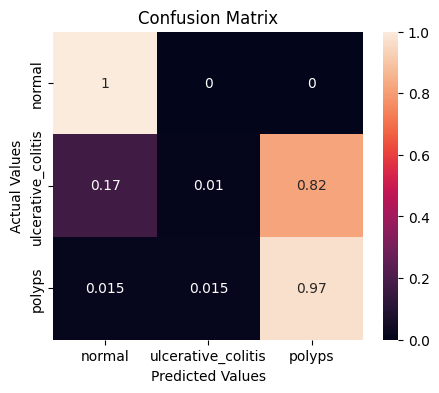

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_true, y_pred, normalize='true')
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['normal','ulcerative_colitis','polyps'], 
                     columns = ['normal','ulcerative_colitis','polyps'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


### Model 3 b :
- val_recall: 0.6887 
- val_accuracy: 0.7027
- Optimizer = rmsprop

In [16]:
model_3b = Sequential()

model_3b.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_3b.add(layers.MaxPool2D(pool_size=(3,3)))
model_3b.add(layers.Dropout(0.3))
model_3b.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_3b.add(layers.MaxPool2D(pool_size=(2,2)))
model_3b.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_3b.add(layers.MaxPool2D(pool_size=(2,2)))

model_3b.add(layers.Flatten())
model_3b.add(layers.Dense(15, activation='relu'))
model_3b.add(layers.Dropout(0.3))
model_3b.add(layers.Dense(5, activation='relu'))
model_3b.add(layers.Dense(3, activation='softmax'))

model_3b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 73, 73, 32)        8224      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 35, 35, 16)       

In [17]:
model_3b.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=[recall, 'accuracy'])

In [18]:
model_3b.fit(train_dataset, 
            epochs=20,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 35s 456ms/step - loss: 0.7707 - recall: 0.5108 - accuracy: 0.5950 - val_loss: 0.6328 - val_recall: 0.5407 - val_accuracy: 0.6687
Epoch 2/20
75/75 [==============================] - 34s 446ms/step - loss: 0.4917 - recall: 0.6629 - accuracy: 0.7396 - val_loss: 0.6504 - val_recall: 0.6533 - val_accuracy: 0.6647
Epoch 3/20
75/75 [==============================] - 33s 446ms/step - loss: 0.4274 - recall: 0.7058 - accuracy: 0.7788 - val_loss: 0.8401 - val_recall: 0.6020 - val_accuracy: 0.6273
Epoch 4/20
75/75 [==============================] - 34s 456ms/step - loss: 0.3433 - recall: 0.7800 - accuracy: 0.8408 - val_loss: 0.8419 - val_recall: 0.6887 - val_accuracy: 0.7027
Epoch 5/20
75/75 [==============================] - 35s 463ms/step - loss: 0.2773 - recall: 0.8442 - accuracy: 0.8737 - val_loss: 1.3675 - val_recall: 0.6387 - val_accuracy: 0.6533
Epoch 6/20
75/75 [==============================] - 35s 469ms/step - loss: 0.1971 - recall: 0.9

### Model 3 c :
- val_recall: 0.2593 
- val_accuracy: 0.7587
- Optimizer = adam
- Learning rate = 0.0001

In [21]:
model_3c = Sequential()

model_3c.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_3c.add(layers.MaxPool2D(pool_size=(3,3)))
model_3c.add(layers.Dropout(0.3))
model_3c.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_3c.add(layers.MaxPool2D(pool_size=(2,2)))
model_3c.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_3c.add(layers.MaxPool2D(pool_size=(2,2)))

model_3c.add(layers.Flatten())
model_3c.add(layers.Dense(15, activation='relu'))
model_3c.add(layers.Dropout(0.3))
model_3c.add(layers.Dense(5, activation='relu'))
model_3c.add(layers.Dense(3, activation='softmax'))

model_3c.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 73, 73, 32)        8224      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 35, 35, 16)       

In [22]:
model_3c.compile(loss='categorical_crossentropy',
               optimizer=adam_opt,
               metrics=[recall, 'accuracy'])

In [23]:
model_3c.fit(train_dataset, 
            epochs=30,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/30
75/75 [==============================] - 34s 445ms/step - loss: 1.0053 - recall_1: 0.1187 - accuracy: 0.3988 - val_loss: 1.0328 - val_recall_1: 0.0420 - val_accuracy: 0.3627
Epoch 2/30
75/75 [==============================] - 36s 473ms/step - loss: 0.8533 - recall_1: 0.3129 - accuracy: 0.5142 - val_loss: 0.9957 - val_recall_1: 0.1307 - val_accuracy: 0.6300
Epoch 3/30
75/75 [==============================] - 33s 437ms/step - loss: 0.7882 - recall_1: 0.3913 - accuracy: 0.5775 - val_loss: 0.9499 - val_recall_1: 0.1647 - val_accuracy: 0.6047
Epoch 4/30
75/75 [==============================] - 33s 445ms/step - loss: 0.7411 - recall_1: 0.4596 - accuracy: 0.6371 - val_loss: 0.8990 - val_recall_1: 0.2593 - val_accuracy: 0.7587
Epoch 5/30
75/75 [==============================] - 34s 450ms/step - loss: 0.6950 - recall_1: 0.4958 - accuracy: 0.7008 - val_loss: 0.9297 - val_recall_1: 0.2187 - val_accuracy: 0.7247
Epoch 6/30
75/75 [==============================] - 33s 444ms/step - loss: 

### Model 3 d :
- val_recall_2: 0.7187 
- val_accuracy: 0.7193
- Optimizer = adam
- Learning rate = 0.01

In [24]:
model_3d = Sequential()

model_3d.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_3d.add(layers.MaxPool2D(pool_size=(3,3)))
model_3d.add(layers.Dropout(0.3))
model_3d.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_3d.add(layers.MaxPool2D(pool_size=(2,2)))
model_3d.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_3d.add(layers.MaxPool2D(pool_size=(2,2)))

model_3d.add(layers.Flatten())
model_3d.add(layers.Dense(15, activation='relu'))
model_3d.add(layers.Dropout(0.3))
model_3d.add(layers.Dense(5, activation='relu'))
model_3d.add(layers.Dense(3, activation='softmax'))

model_3d.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 73, 73, 32)        8224      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 35, 35, 16)       

In [26]:
model_3d.compile(loss='categorical_crossentropy',
               optimizer=adam_opt_1,
               metrics=[recall, 'accuracy'])

In [27]:
model_3d.fit(train_dataset, 
            epochs=30,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/30
75/75 [==============================] - 34s 451ms/step - loss: 0.7765 - recall_2: 0.3517 - accuracy: 0.6154 - val_loss: 0.7173 - val_recall_2: 0.4200 - val_accuracy: 0.6387
Epoch 2/30
75/75 [==============================] - 32s 432ms/step - loss: 0.3857 - recall_2: 0.7904 - accuracy: 0.8450 - val_loss: 1.0397 - val_recall_2: 0.6467 - val_accuracy: 0.6493
Epoch 3/30
75/75 [==============================] - 32s 433ms/step - loss: 0.2916 - recall_2: 0.8600 - accuracy: 0.8608 - val_loss: 1.5531 - val_recall_2: 0.6500 - val_accuracy: 0.6573
Epoch 4/30
75/75 [==============================] - 33s 435ms/step - loss: 0.2262 - recall_2: 0.8796 - accuracy: 0.8800 - val_loss: 0.9676 - val_recall_2: 0.7187 - val_accuracy: 0.7193
Epoch 5/30
75/75 [==============================] - 32s 433ms/step - loss: 0.1995 - recall_2: 0.8796 - accuracy: 0.8808 - val_loss: 1.3921 - val_recall_2: 0.6633 - val_accuracy: 0.6633
Epoch 6/30
75/75 [==============================] - 33s 443ms/step - loss: 

### Model 3 e :
- val_recall: 0.6680 
- val_accuracy: 0.7107
- Optimizer = adam
- Learning rate = 0.005

In [30]:
model_3e = Sequential()

model_3e.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_3e.add(layers.MaxPool2D(pool_size=(3,3)))
model_3e.add(layers.Dropout(0.3))
model_3e.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_3e.add(layers.MaxPool2D(pool_size=(2,2)))
model_3e.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_3e.add(layers.MaxPool2D(pool_size=(2,2)))

model_3e.add(layers.Flatten())
model_3e.add(layers.Dense(15, activation='relu'))
model_3e.add(layers.Dropout(0.3))
model_3e.add(layers.Dense(5, activation='relu'))
model_3e.add(layers.Dense(3, activation='softmax'))

model_3e.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 73, 73, 32)        8224      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 35, 35, 16)       

In [31]:
model_3e.compile(loss='categorical_crossentropy',
               optimizer=adam_opt_2,
               metrics=[recall, 'accuracy'])

In [32]:
model_3e.fit(train_dataset, 
            epochs=30,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/30
75/75 [==============================] - 33s 433ms/step - loss: 0.7475 - recall_4: 0.3021 - accuracy: 0.6367 - val_loss: 0.9380 - val_recall_4: 0.4187 - val_accuracy: 0.6507
Epoch 2/30
75/75 [==============================] - 32s 432ms/step - loss: 0.5273 - recall_4: 0.5321 - accuracy: 0.8125 - val_loss: 1.4683 - val_recall_4: 0.4187 - val_accuracy: 0.6687
Epoch 3/30
75/75 [==============================] - 32s 429ms/step - loss: 0.4098 - recall_4: 0.8213 - accuracy: 0.8604 - val_loss: 1.4619 - val_recall_4: 0.6680 - val_accuracy: 0.7107
Epoch 4/30
75/75 [==============================] - 32s 430ms/step - loss: 0.3251 - recall_4: 0.8838 - accuracy: 0.8875 - val_loss: 1.8521 - val_recall_4: 0.5767 - val_accuracy: 0.6487
Epoch 5/30
75/75 [==============================] - 32s 433ms/step - loss: 0.2971 - recall_4: 0.8879 - accuracy: 0.8900 - val_loss: 1.3833 - val_recall_4: 0.6607 - val_accuracy: 0.6653
Epoch 6/30
75/75 [==============================] - 33s 445ms/step - loss: 

### Model 4 :
- val_recall_1: 0.6620 
- val_accuracy: 0.6620

In [24]:
model_4 = Sequential()

model_4.add(layers.Conv2D(128, kernel_size=(5,5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_4.add(layers.MaxPool2D(pool_size=(3,3)))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(25, activation='relu'))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(15, activation='relu'))
model_4.add(layers.Dense(3, activation='softmax'))

model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 128)     9728      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 73, 73, 64)        32832     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 35, 35, 32)       

In [25]:
model_4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [26]:
model_4.fit(train_dataset, 
            epochs=20,
           callbacks=[es],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 86s 1s/step - loss: 0.5192 - recall_1: 0.6877 - accuracy: 0.7729 - val_loss: 0.9029 - val_recall_1: 0.6180 - val_accuracy: 0.6227
Epoch 2/20
75/75 [==============================] - 88s 1s/step - loss: 0.1503 - recall_1: 0.9383 - accuracy: 0.9446 - val_loss: 1.3762 - val_recall_1: 0.6620 - val_accuracy: 0.6660
Epoch 3/20
75/75 [==============================] - 94s 1s/step - loss: 0.0697 - recall_1: 0.9708 - accuracy: 0.9708 - val_loss: 1.7109 - val_recall_1: 0.6613 - val_accuracy: 0.6640
Epoch 4/20
75/75 [==============================] - 89s 1s/step - loss: 0.0499 - recall_1: 0.9783 - accuracy: 0.9792 - val_loss: 2.4538 - val_recall_1: 0.6620 - val_accuracy: 0.6620
Epoch 5/20
75/75 [==============================] - 89s 1s/step - loss: 0.0462 - recall_1: 0.9817 - accuracy: 0.9825 - val_loss: 2.4233 - val_recall_1: 0.6493 - val_accuracy: 0.6533
Epoch 6/20
75/75 [==============================] - 88s 1s/step - loss: 0.0312 - recall_1:

### Model 5 :
- val_recall_1: 0.6213 
- val_accuracy: 0.6393

In [29]:
model_5 = Sequential()

model_5.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_5.add(layers.MaxPool2D(pool_size=(2,2)))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model_5.add(layers.MaxPool2D(pool_size=(2,2)))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu'))
model_5.add(layers.MaxPool2D(pool_size=(2,2)))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(15, activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Dense(10, activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Dense(3, activation='softmax'))

model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 111, 111, 32)      8224      
                                                                 
 dropout_18 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 110, 110, 32)      4128      
                                                      

In [30]:
model_5.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [31]:
model_5.fit(train_dataset, 
            epochs=20,
           callbacks=[es],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 54s 717ms/step - loss: 0.9336 - recall_1: 0.3928 - accuracy: 0.5467 - val_loss: 0.8310 - val_recall_1: 0.3287 - val_accuracy: 0.6267
Epoch 2/20
75/75 [==============================] - 54s 719ms/step - loss: 0.6947 - recall_1: 0.4308 - accuracy: 0.7337 - val_loss: 0.8426 - val_recall_1: 0.3407 - val_accuracy: 0.6247
Epoch 3/20
75/75 [==============================] - 55s 727ms/step - loss: 0.5718 - recall_1: 0.5063 - accuracy: 0.8250 - val_loss: 0.7545 - val_recall_1: 0.3373 - val_accuracy: 0.5987
Epoch 4/20
75/75 [==============================] - 58s 777ms/step - loss: 0.4670 - recall_1: 0.5925 - accuracy: 0.8750 - val_loss: 0.8614 - val_recall_1: 0.3360 - val_accuracy: 0.5960
Epoch 5/20
75/75 [==============================] - 61s 815ms/step - loss: 0.3966 - recall_1: 0.8025 - accuracy: 0.8904 - val_loss: 0.8501 - val_recall_1: 0.5993 - val_accuracy: 0.6280
Epoch 6/20
75/75 [==============================] - 58s 781ms/step - loss: 

### Model 6 :
- val_recall: 0.6620 
- val_accuracy: 0.6980

In [4]:
model_6 = Sequential()

model_6.add(layers.Conv2D(128, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_6.add(layers.MaxPool2D(pool_size=(2,2)))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_6.add(layers.MaxPool2D(pool_size=(2,2)))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model_6.add(layers.MaxPool2D(pool_size=(2,2)))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Conv2D(8, kernel_size=(3,3), activation='relu'))
model_6.add(layers.MaxPool2D(pool_size=(2,2)))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(15, activation='relu'))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Dense(5, activation='relu'))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Dense(3, activation='softmax'))

model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 55, 55, 64)        0

In [5]:
model_6.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [6]:
es_10 = EarlyStopping(patience=10, restore_best_weights=True)
model_6.fit(train_dataset, 
            epochs=20,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/20
75/75 [==============================] - 132s 2s/step - loss: 1.0364 - recall: 0.0650 - accuracy: 0.3817 - val_loss: 1.1641 - val_recall: 0.0073 - val_accuracy: 0.4920
Epoch 2/20
75/75 [==============================] - 138s 2s/step - loss: 0.8519 - recall: 0.3521 - accuracy: 0.5546 - val_loss: 1.2156 - val_recall: 0.3333 - val_accuracy: 0.4913
Epoch 3/20
75/75 [==============================] - 145s 2s/step - loss: 0.7567 - recall: 0.4454 - accuracy: 0.6175 - val_loss: 0.6649 - val_recall: 0.4613 - val_accuracy: 0.6227
Epoch 4/20
75/75 [==============================] - 141s 2s/step - loss: 0.6612 - recall: 0.4608 - accuracy: 0.6592 - val_loss: 0.6547 - val_recall: 0.4967 - val_accuracy: 0.6593
Epoch 5/20
75/75 [==============================] - 141s 2s/step - loss: 0.6270 - recall: 0.4758 - accuracy: 0.6712 - val_loss: 0.7621 - val_recall: 0.4780 - val_accuracy: 0.6667
Epoch 6/20
75/75 [==============================] - 334s 4s/step - loss: 0.5918 - recall: 0.5046 - accura

### Model 7 :
- val_recall: 0.6573 
- val_accuracy: 0.6613

In [8]:
model_7 = Sequential()

model_7.add(layers.Conv2D(64, kernel_size=(5,5), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_7.add(layers.MaxPool2D(pool_size=(3,3)))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model_7.add(layers.MaxPool2D(pool_size=(2,2)))
model_7.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model_7.add(layers.MaxPool2D(pool_size=(2,2)))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Conv2D(8, kernel_size=(2,2), activation='relu'))

model_7.add(layers.Flatten())
model_7.add(layers.Dense(20, activation='relu'))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Dense(10, activation='relu'))
model_7.add(layers.Dense(3, activation='softmax'))

model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 74, 74, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 16)       

In [9]:
model_7.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [10]:
model_7.fit(train_dataset, 
            epochs=30,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/30
75/75 [==============================] - 40s 528ms/step - loss: 0.7978 - recall: 0.5062 - accuracy: 0.5842 - val_loss: 0.7893 - val_recall: 0.5420 - val_accuracy: 0.5733
Epoch 2/30
75/75 [==============================] - 39s 521ms/step - loss: 0.4327 - recall: 0.7679 - accuracy: 0.7962 - val_loss: 0.8764 - val_recall: 0.6287 - val_accuracy: 0.6300
Epoch 3/30
75/75 [==============================] - 53s 710ms/step - loss: 0.2885 - recall: 0.8600 - accuracy: 0.8750 - val_loss: 1.2470 - val_recall: 0.5487 - val_accuracy: 0.5740
Epoch 4/30
75/75 [==============================] - 49s 651ms/step - loss: 0.1818 - recall: 0.9221 - accuracy: 0.9342 - val_loss: 1.4913 - val_recall: 0.6073 - val_accuracy: 0.6273
Epoch 5/30
75/75 [==============================] - 45s 602ms/step - loss: 0.1397 - recall: 0.9458 - accuracy: 0.9525 - val_loss: 1.5909 - val_recall: 0.5713 - val_accuracy: 0.5947
Epoch 6/30
75/75 [==============================] - 43s 575ms/step - loss: 0.1272 - recall: 0.9

### Model 8 :
- val_recall: 0.6600 
- val_accuracy: 0.6607

In [12]:
model_8 = Sequential()

model_8.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_8.add(layers.MaxPool2D(pool_size=(3,3)))
model_8.add(layers.Dropout(0.3))
model_8.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model_8.add(layers.MaxPool2D(pool_size=(2,2)))
model_8.add(layers.Dropout(0.3))
model_8.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu'))
model_8.add(layers.MaxPool2D(pool_size=(2,2)))

model_8.add(layers.Flatten())
model_8.add(layers.Dense(20, activation='relu'))
model_8.add(layers.Dropout(0.3))
model_8.add(layers.Dense(5, activation='relu'))
model_8.add(layers.Dense(3, activation='softmax'))

model_8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 36, 36, 32)       

In [13]:
model_8.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=[recall, 'accuracy'])

In [14]:
model_8.fit(train_dataset, 
            epochs=30,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/30
75/75 [==============================] - 36s 472ms/step - loss: 0.8213 - recall: 0.4890 - accuracy: 0.6117 - val_loss: 0.7518 - val_recall: 0.4673 - val_accuracy: 0.6467
Epoch 2/30
75/75 [==============================] - 36s 481ms/step - loss: 0.5130 - recall: 0.6421 - accuracy: 0.7967 - val_loss: 0.9012 - val_recall: 0.4180 - val_accuracy: 0.5707
Epoch 3/30
75/75 [==============================] - 37s 499ms/step - loss: 0.3383 - recall: 0.7788 - accuracy: 0.8675 - val_loss: 1.4259 - val_recall: 0.5633 - val_accuracy: 0.6147
Epoch 4/30
75/75 [==============================] - 38s 513ms/step - loss: 0.2200 - recall: 0.8467 - accuracy: 0.9246 - val_loss: 2.0935 - val_recall: 0.6567 - val_accuracy: 0.6587
Epoch 5/30
75/75 [==============================] - 37s 499ms/step - loss: 0.1539 - recall: 0.8675 - accuracy: 0.9504 - val_loss: 2.0565 - val_recall: 0.5600 - val_accuracy: 0.5840
Epoch 6/30
75/75 [==============================] - 38s 506ms/step - loss: 0.1590 - recall: 0.8

### Model 9 :
- val_recall: 0.6627 
- val_accuracy: 0.6627


In [33]:
model_9 = Sequential()

model_9.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model_9.add(layers.MaxPool2D(pool_size=(3,3)))
model_9.add(layers.Dropout(0.3))
model_9.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu', padding='same'))
model_9.add(layers.MaxPool2D(pool_size=(2,2)))
model_9.add(layers.Conv2D(16, kernel_size=(2,2), activation='relu', padding='same'))
model_9.add(layers.MaxPool2D(pool_size=(2,2)))

model_9.add(layers.Flatten())
model_9.add(layers.Dense(15, activation='relu'))
model_9.add(layers.Dropout(0.3))
model_9.add(layers.Dense(5, activation='relu'))
model_9.add(layers.Dense(3, activation='softmax'))

model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 74, 74, 32)        8224      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 37, 37, 16)       

In [34]:
model_9.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [35]:
model_9.fit(train_dataset, 
            epochs=25,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/25
75/75 [==============================] - 33s 433ms/step - loss: 0.8729 - recall_4: 0.4331 - accuracy: 0.5817 - val_loss: 1.3177 - val_recall_4: 0.3360 - val_accuracy: 0.4113
Epoch 2/25
75/75 [==============================] - 34s 450ms/step - loss: 0.3853 - recall_4: 0.7946 - accuracy: 0.8479 - val_loss: 1.6226 - val_recall_4: 0.6593 - val_accuracy: 0.6600
Epoch 3/25
75/75 [==============================] - 34s 457ms/step - loss: 0.1983 - recall_4: 0.8813 - accuracy: 0.9129 - val_loss: 2.0759 - val_recall_4: 0.6267 - val_accuracy: 0.6280
Epoch 4/25
75/75 [==============================] - 36s 479ms/step - loss: 0.1371 - recall_4: 0.9329 - accuracy: 0.9575 - val_loss: 1.9294 - val_recall_4: 0.6587 - val_accuracy: 0.6593
Epoch 5/25
75/75 [==============================] - 36s 478ms/step - loss: 0.1223 - recall_4: 0.9229 - accuracy: 0.9525 - val_loss: 2.0882 - val_recall_4: 0.6593 - val_accuracy: 0.6593
Epoch 6/25
75/75 [==============================] - 36s 473ms/step - loss: 

### Model 10 :
- val_recall: 0.7093 
- val_accuracy: 0.7093

In [36]:
model_10 = Sequential()

model_10.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'))
model_10.add(layers.MaxPool2D(pool_size=(2,2)))
model_10.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_10.add(layers.MaxPool2D(pool_size=(2,2)))
model_10.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model_10.add(layers.MaxPool2D(pool_size=(2,2)))
model_10.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
model_10.add(layers.MaxPool2D(pool_size=(2,2)))
model_10.add(layers.Dropout(0.5))

model_10.add(layers.Flatten())
model_10.add(layers.Dense(128, activation='relu'))
model_10.add(layers.Dropout(0.1))
model_10.add(layers.Dense(256, activation='relu'))
model_10.add(layers.Dropout(0.25))
model_10.add(layers.Dense(3, activation='softmax'))

model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 26, 26, 128)    

In [37]:
model_10.compile(loss='categorical_crossentropy',
               optimizer=adam_opt,
               metrics=[recall, 'accuracy'])

In [38]:
model_10.fit(train_dataset, 
            epochs=25,
           callbacks=[es_10],
           validation_data=val_dataset)

Epoch 1/25
75/75 [==============================] - 54s 715ms/step - loss: 0.6170 - recall_4: 0.5703 - accuracy: 0.7212 - val_loss: 0.6414 - val_recall_4: 0.7093 - val_accuracy: 0.7093
Epoch 2/25
75/75 [==============================] - 55s 730ms/step - loss: 0.2440 - recall_4: 0.8996 - accuracy: 0.9025 - val_loss: 0.5987 - val_recall_4: 0.6873 - val_accuracy: 0.7067
Epoch 3/25
75/75 [==============================] - 56s 745ms/step - loss: 0.1380 - recall_4: 0.9433 - accuracy: 0.9446 - val_loss: 0.7026 - val_recall_4: 0.6860 - val_accuracy: 0.6973
Epoch 4/25
75/75 [==============================] - 58s 772ms/step - loss: 0.0605 - recall_4: 0.9804 - accuracy: 0.9804 - val_loss: 1.6265 - val_recall_4: 0.6700 - val_accuracy: 0.6707
Epoch 5/25
75/75 [==============================] - 59s 789ms/step - loss: 0.0322 - recall_4: 0.9900 - accuracy: 0.9900 - val_loss: 2.2880 - val_recall_4: 0.6653 - val_accuracy: 0.6667
Epoch 6/25
75/75 [==============================] - 67s 897ms/step - loss: 

### Model 11 :
- val_recall_4: 0.6647 
- val_accuracy: 0.6647


In [40]:
model_11 = Sequential()

model_11.add(layers.Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'))
model_11.add(layers.MaxPool2D(pool_size=(2,2)))
model_11.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model_11.add(layers.MaxPool2D(pool_size=(2,2)))
model_11.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model_11.add(layers.MaxPool2D(pool_size=(2,2)))
model_11.add(layers.Dropout(0.5))

model_11.add(layers.Flatten())
model_11.add(layers.Dense(64, activation='relu'))
model_11.add(layers.Dropout(0.5))
model_11.add(layers.Dense(32, activation='relu'))
model_11.add(layers.Dense(3, activation='softmax'))

model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 26, 26, 32)     

In [42]:
model_11.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=[recall, 'accuracy'])

In [43]:
model_11.fit(train_dataset, 
            epochs=25,
           callbacks=[es],
           validation_data=val_dataset)

Epoch 1/25
75/75 [==============================] - 57s 748ms/step - loss: 0.4175 - recall_4: 0.7082 - accuracy: 0.7987 - val_loss: 2.3139 - val_recall_4: 0.6387 - val_accuracy: 0.6387
Epoch 2/25
75/75 [==============================] - 57s 759ms/step - loss: 0.0967 - recall_4: 0.9696 - accuracy: 0.9712 - val_loss: 5.1703 - val_recall_4: 0.6500 - val_accuracy: 0.6500
Epoch 3/25
75/75 [==============================] - 58s 766ms/step - loss: 0.0738 - recall_4: 0.9762 - accuracy: 0.9775 - val_loss: 2.8654 - val_recall_4: 0.6507 - val_accuracy: 0.6513
Epoch 4/25
75/75 [==============================] - 60s 797ms/step - loss: 0.0333 - recall_4: 0.9892 - accuracy: 0.9917 - val_loss: 3.0127 - val_recall_4: 0.6627 - val_accuracy: 0.6627
Epoch 5/25
75/75 [==============================] - 61s 810ms/step - loss: 0.0326 - recall_4: 0.9867 - accuracy: 0.9883 - val_loss: 3.4320 - val_recall_4: 0.6600 - val_accuracy: 0.6600
Epoch 6/25
75/75 [==============================] - 117s 2s/step - loss: 0.